<a href="https://colab.research.google.com/github/larsmoan/COMP3710/blob/main/fractals_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} for computation")

PyTorch Version: 2.0.1+cu118
Using cuda for computation


In [2]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important! zs = z.clone() #Updated!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [3]:
for i in range(200):
    #Compute the new values of z: z^2 + c
    zs_ = zs**2 + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4
    ns += not_diverged
    zs = zs_

<ipython-input-4-8ac18d2a0fe4>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


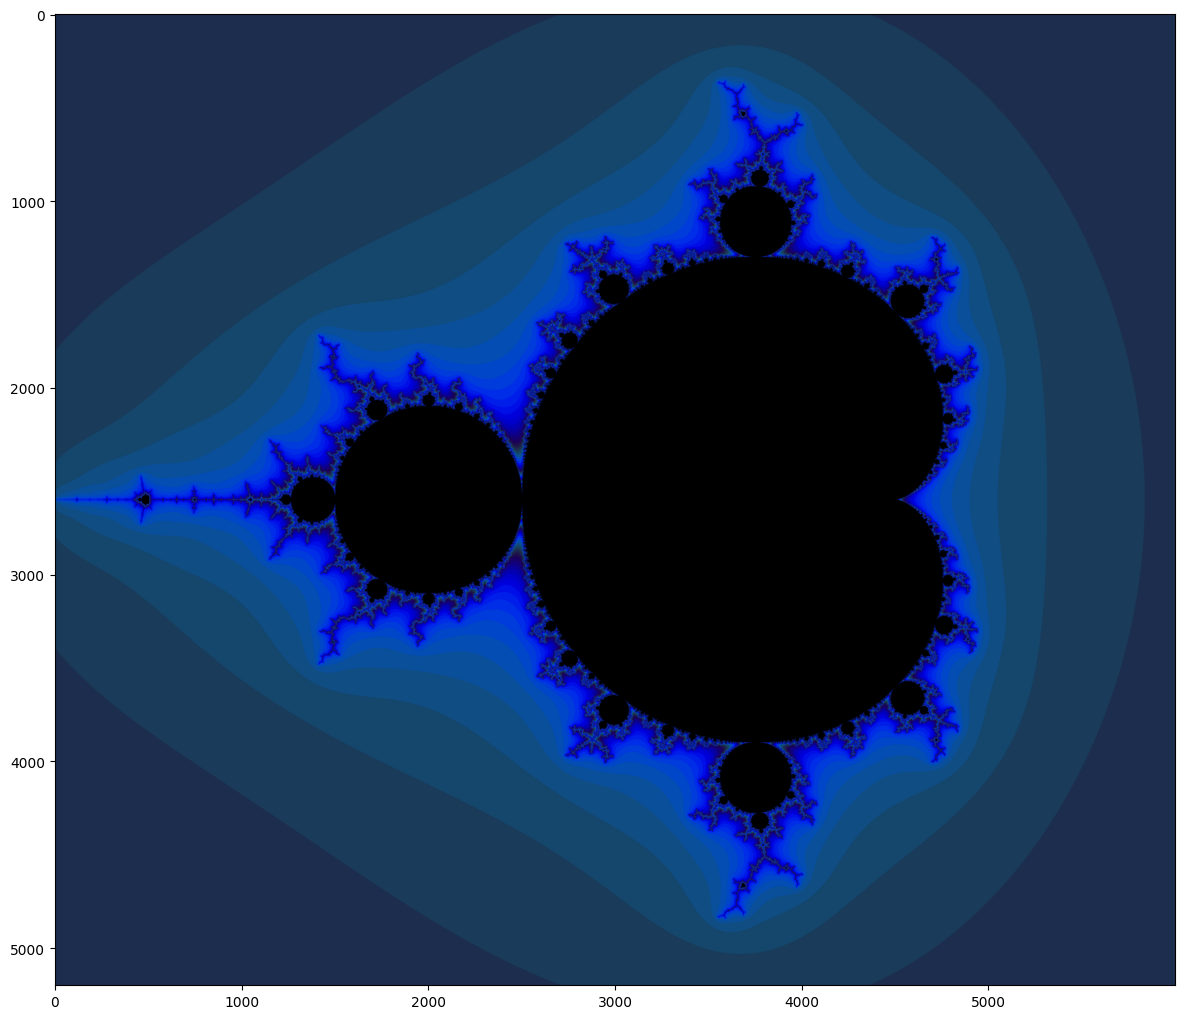

In [4]:
fig = plt.figure(figsize=(16,10))


def processFractal(a):
    """Display an array of iteration counts as a
                colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()